In [11]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### DATA WRANGLING

In [12]:
# reading and accessing the data
data = pd.read_csv("Ecommerce Customers.csv")

In [4]:
# overview of the data
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
data.Address.nunique()

500

In [7]:
data.Email.nunique()

500

In [8]:
data.Avatar.nunique()

138

In [9]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### EDA

<Figure size 576x504 with 0 Axes>

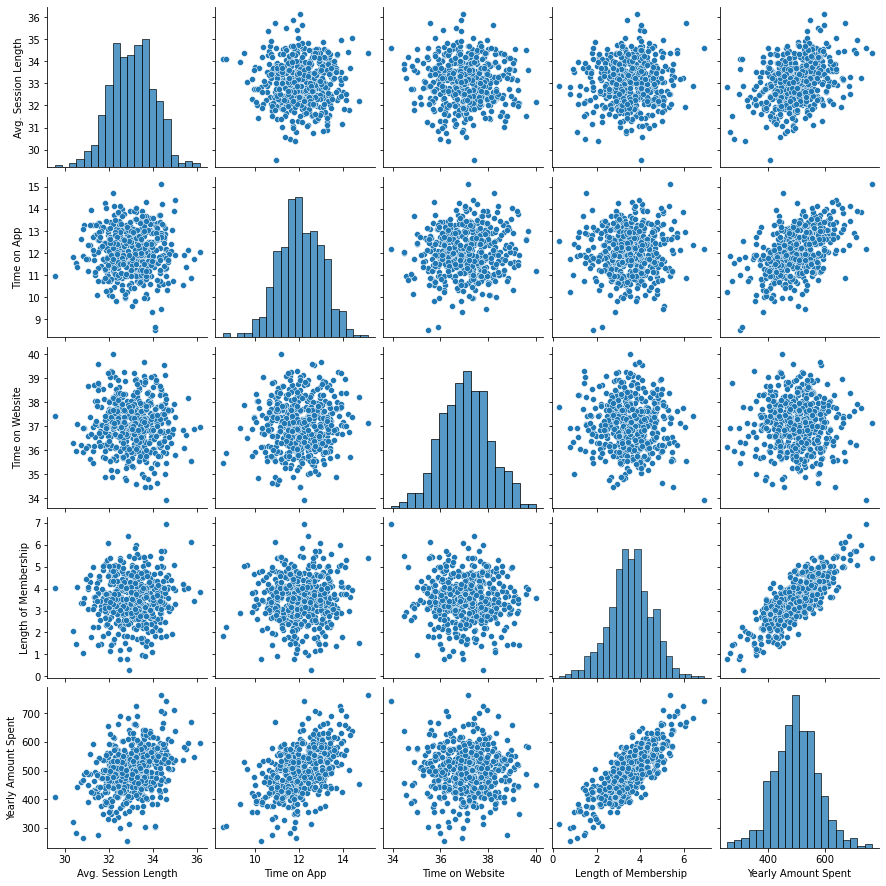

In [14]:
plt.figure(figsize=(8,7))
sns.pairplot(data);


<li>From the pairplot above, the length of membership has the strongest correlation with the yearly amount spent.</li>
<li>Time on app and av. session length also has a strong correlation </li>


<AxesSubplot:xlabel='Avg. Session Length', ylabel='Yearly Amount Spent'>

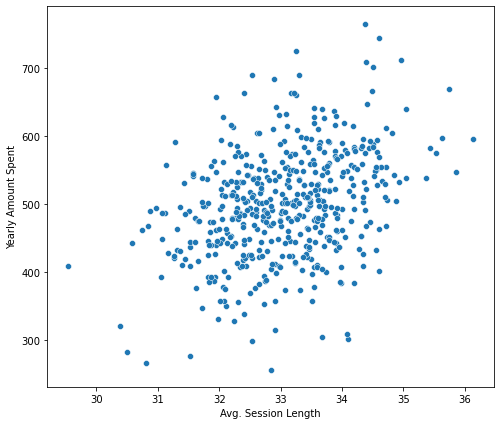

In [18]:
plt.figure(figsize=(8,7))
sns.scatterplot(x="Avg. Session Length", y="Yearly Amount Spent", data=data)

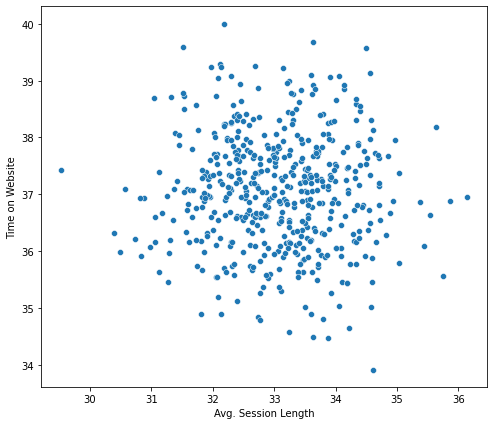

In [20]:
plt.figure(figsize=(8,7))
sns.scatterplot(x="Avg. Session Length", y="Time on Website", data=data)
plt.show()

In [22]:
data.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<AxesSubplot:>

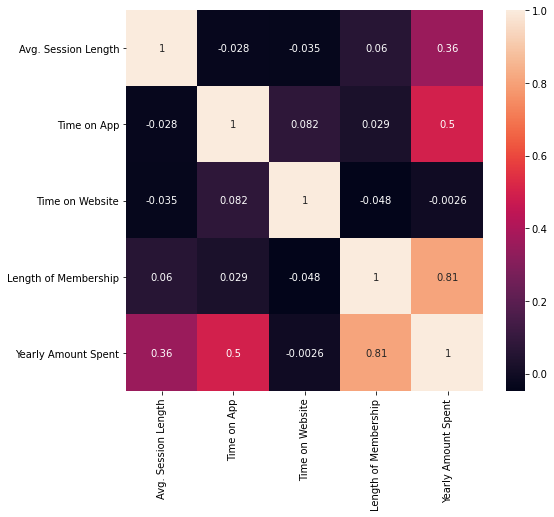

In [24]:
plt.figure(figsize=(8,7))
sns.heatmap(data.corr(), annot=True)

## Feature Selection

In [54]:
# importing from sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [67]:
# selecting Features and splitting into train and test 
X = data[["Avg. Session Length","Time on App", "Length of Membership"]]
y = data["Yearly Amount Spent"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [68]:
# checking if the number of rows pf train and test are constant
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)

print("\nX_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (400, 3)
y_train:  (400,)

X_test:  (100, 3)
y_test:  (100,)


## Model Selection

In [69]:
model = LinearRegression()

## Model Training

In [70]:
# Training the model
model.fit(X_train, y_train)

LinearRegression()

In [71]:
# Predicting our model
y_pred = model.predict(X_test)

In [72]:
y_pred

array([559.76362305, 478.27015146, 455.0843574 , 537.64869692,
       481.36696623, 506.80832832, 499.50305655, 588.6679336 ,
       532.01372577, 518.36315371, 522.63854541, 435.2546552 ,
       499.02243263, 461.47153046, 589.40992811, 491.17726587,
       590.76269511, 685.30712481, 431.78054097, 439.80561325,
       389.50588519, 754.96987019, 505.20528231, 565.36971968,
       611.12273475, 421.61041885, 507.11748108, 600.26108655,
       437.9330857 , 504.60021115, 452.14128197, 495.55717191,
       599.2264938 , 468.67918651, 422.4387961 , 464.01758269,
       591.38125307, 508.03440924, 467.74600873, 430.54602609,
       479.73353961, 416.95261785, 471.56468829, 514.70538859,
       464.62272963, 513.80663947, 530.92355575, 574.90476838,
       725.34870813, 411.68820801, 325.35984314, 685.78903354,
       554.38958834, 522.25884616, 431.80482348, 501.7629257 ,
       543.72706308, 488.95209195, 500.82557595, 583.61149837,
       557.94022946, 511.96167446, 534.96301384, 530.37

## Model Evaluation

In [73]:
# mean absolute error
mean_absolute_error(y_test, y_pred)

7.401347486635466

In [74]:
# Mean Squared Error
mean_squared_error(y_test, y_pred, squared=True)

95.9354555294606

In [75]:
# Root Mean Squared Error
mean_squared_error(y_test, y_pred, squared=False)

9.794664646094862

# Re-evaluation

In [79]:
# selecting Features and splitting into train and test 
X_1 = data[["Time on App", "Length of Membership"]]
y_1 = data["Yearly Amount Spent"]
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=5)

In [80]:
model_1 = LinearRegression()

In [82]:
model_1.fit(X_train, y_train)

LinearRegression()

In [83]:
y_pred_1 = model_1.predict(X_test)

In [84]:
y_pred_1

array([571.01185002, 499.79139855, 480.27135348, 531.95050407,
       507.18715237, 526.16383687, 480.40648769, 556.22125394,
       559.99044852, 486.1539055 , 531.03287879, 433.33078586,
       482.47344459, 463.47905747, 578.16063426, 521.50431117,
       613.82031934, 695.86676068, 403.79160925, 456.56158751,
       416.70923248, 722.2852785 , 497.68556082, 548.53062606,
       580.58362186, 465.35595993, 498.19364988, 556.68760274,
       450.32184973, 521.83630827, 478.52386182, 532.53196315,
       588.78549587, 425.35458583, 378.77211053, 472.48496052,
       587.34888825, 494.29705287, 445.84061625, 405.26905688,
       463.97231044, 406.10573668, 462.21321709, 538.27574412,
       483.04216541, 521.23473093, 488.524585  , 553.99618662,
       725.4330596 , 412.93742033, 350.0201373 , 683.8040235 ,
       544.84790028, 521.75779898, 433.83214882, 522.47215059,
       550.3619542 , 468.00860122, 497.18674315, 602.5659951 ,
       589.25656224, 500.67456041, 487.75280285, 525.42

In [88]:
print("MAE: ", mean_absolute_error(y_test,y_pred_1))
print("MSE: ", mean_squared_error(y_test, y_pred_1))
print("RMSE ", mean_squared_error(y_test, y_pred_1, squared=False))

MAE:  20.512122578004334
MSE:  682.4211915274632
RMSE  26.1231925982921


In [89]:
# selecting Features and splitting into train and test 
X_2 = data[["Length of Membership"]]
y_2 = data["Yearly Amount Spent"]
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=5)

In [90]:
model_2 = LinearRegression()

In [91]:
model_2.fit(X_train, y_train)

LinearRegression()

In [92]:
y_pred_2  = model.predict(X_test)

In [93]:
print("MAE: ", mean_absolute_error(y_test,y_pred_2))
print("MSE: ", mean_squared_error(y_test, y_pred_2))
print("RMSE ", mean_squared_error(y_test, y_pred_2, squared=False))

MAE:  20.512122578004334
MSE:  682.4211915274632
RMSE  26.1231925982921


# Re-Evalaution

In [95]:
# selecting Features and splitting into train and test 
X = data[["Avg. Session Length","Time on App","Time on Website", "Length of Membership"]]
y = data["Yearly Amount Spent"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [96]:
model_3 = LinearRegression()

In [97]:
model_3.fit(X_train, y_train)

LinearRegression()

In [100]:
y_pred_3 = model_3.predict(X_test)

In [102]:
print("MAE: ", mean_absolute_error(y_test,y_pred_3))
print("MSE: ", mean_squared_error(y_test, y_pred_3))
print("RMSE ", mean_squared_error(y_test, y_pred_3, squared=False))

MAE:  7.424561345028171
MSE:  95.78550863644523
RMSE  9.787007133768997


C:\Users\user1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Yearly Amount Spent'>

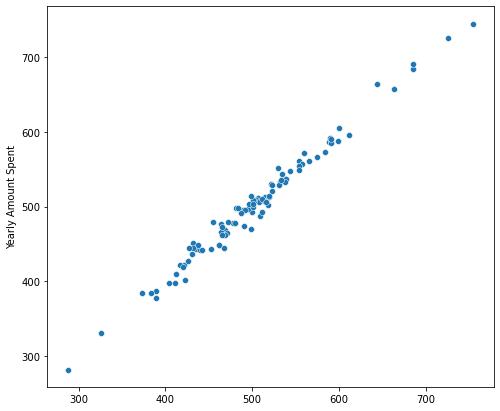

In [103]:
plt.figure(figsize=(8,7))
sns.scatterplot(y_pred, y_test)

In [106]:
model_3.coef_

array([25.88892578, 38.53038518,  0.45876038, 61.82406428])